In [1]:
# Standard stuff
import numpy as np                              #For almost everything
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9']
cmap = ListedColormap([np.array([0, 114.0/256, 178.0/256, 1]),
                       np.array([0, 158.0/256, 115.0/256, 1]),
                       np.array([213.0/256, 94.0/256, 0, 1]),
                       np.array([204.0/256, 121.0/256, 167.0/256, 1]),
                       np.array([86.0/256, 180.0/256, 233.0/256, 1])])

In [2]:
BeforeTrans = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190502SCavityPolOptimization/BeforeOptimization.txt',delimiter=',')
AfterTrans = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190502SCavityPolOptimization/AfterOptimization.txt',delimiter=',')

In [3]:
BeforeTranspk = max(BeforeTrans[:,1])
BeforeExtraTranspk = max(BeforeTrans[6000:,1])
AfterTranspk = max(AfterTrans[:,1])

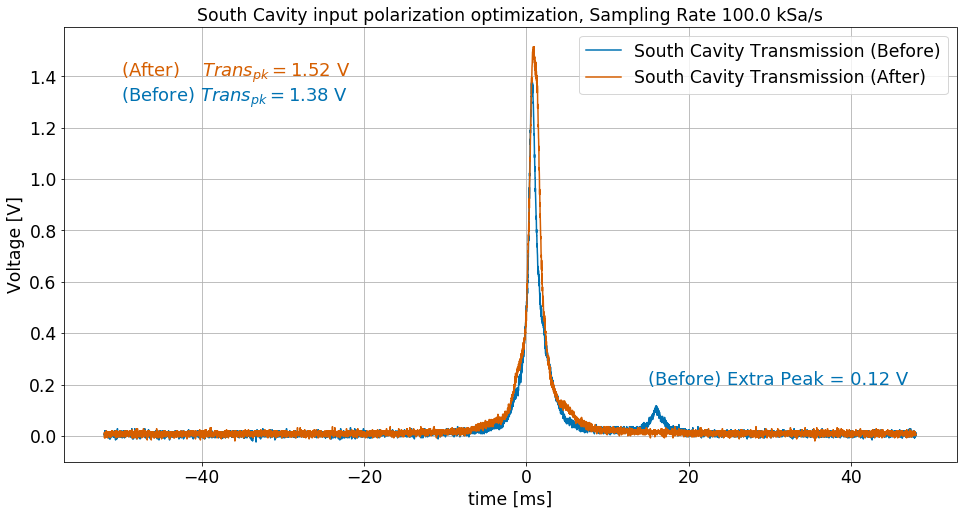

In [4]:
tt = BeforeTrans[:,0]*1e3
SR = 1/(tt[1]-tt[0])
fig = plt.figure(figsize=[16,8])
ax = fig.gca()
ax.plot(tt,BeforeTrans[:,1], color = cList[0],label=r'South Cavity Transmission (Before)')
ax.plot(tt,AfterTrans[:,1], color = cList[2],label=r'South Cavity Transmission (After)')

ax.set_title('South Cavity input polarization optimization, Sampling Rate '+str(np.round(SR,2))+' kSa/s')
ax.set_xlabel('time [ms]')
ax.set_ylabel('Voltage [V]')

ax.grid('on', which='both')
ax.grid(alpha=0.2, which='minor')
ax.legend()

ax.text(-50,1.4,r'(After)    $Trans_{pk} = $'+str(np.round(AfterTranspk,2))+' V', fontsize=18,color=cList[2])
ax.text(-50,1.3,r'(Before) $Trans_{pk} = $'+str(np.round(BeforeTranspk,2))+' V', fontsize=18,color=cList[0])
ax.text(15,0.2,r'(Before) Extra Peak = '+str(np.round(BeforeExtraTranspk,2))+' V', fontsize=18,color=cList[0])

figlist +=[fig]

In [5]:
pp = PdfPages('SCavPolOptimization.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()